You will use the relaxation method to solve for the potential of a series of charged particles. In the github under HOMEWORK5 there is a datafile names “particles.dat.” Inside this datafile is a set of (x,y) coordinates for a series of charged particles, all with charge equal to the electron charge. The range of coordinates is [0,100]. As with example 9.2 in Newman, these particles are placed in a box that is grounded on all 4 sides.

(a) Using the cloud-in-cell technique, assign the charges to a two-dimensional grid of size [0,M] per side, with M=100. The centers of each grid cell (i,j) is (i+0.5,j+0.5). Produce an image of the charge density field.


(b) Use standard relaxation method to solve for Poisson’s equation. Produce an image showing the resulting potential field. Note the number of iterations it takes to converge. Use the same convergence criterion as the example in Newman, such that the maximum difference for any cell in the grid between the current and prior step is 1.0E-10.

(c) Now use the Guass-Seidel overrelaxation method to solve for Poisson’s equation. Determine the optimal value of the overrelaxation parameter ω, using one of the techniques discussed in class and in the chapter on nonlinear equations. Golden ratio search is a good example. Find the optimal value of ω to a precision of 0.001. Produce a plot showing how your answer for ω evolves with each step in your minimization process.


# Notes: Use relaxation method to solve the problem, and compare it to the values given in particles.dat

In [296]:
import numpy as np
import matplotlib.pyplot as plt

In [297]:
particles = np.loadtxt('../dat/particles.dat')

In [291]:
for particle in particles:
    particle

In [292]:
particles[0]

array([51.526619, 53.322742])

In [293]:
particle

array([51.526619, 53.322742])

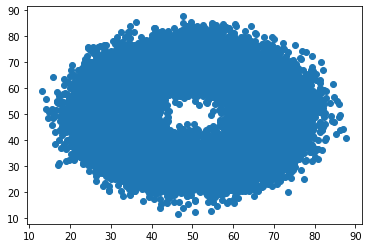

In [251]:
plt.scatter(particles[:,0],particles[:,1])

In [305]:
class Grid():
    def __init__(self,length,width):
        self.length = length
        self.width = width
        self.box = np.zeros([length,width])
    
    def CIC_interp(self,particles):
        """
        
        """
        for particle in particles:
            #closest values in X and y
            NNx = int(np.floor(particle[0]) ), int(np.ceil(particle[0]) )
            NNy = int(np.floor(particle[1])), int(np.ceil(particle[1]))
            
            contrib_lower_X = abs(1 - particle[0] + NNx[0])
            contrib_upper_X = 1 - contrib_lower_X

            contrib_lower_Y = abs(1 - particle[1] + NNy[0])
            contrib_upper_Y = 1 - contrib_lower_Y
            
            self.box[NNx[0]-1,NNy[0]-1] += contrib_lower_X*contrib_lower_Y
            self.box[NNx[0]-1,NNy[1]-1] += contrib_lower_X*contrib_upper_Y
            self.box[NNx[1]-1,NNy[0]-1] += contrib_upper_X*contrib_lower_Y
            self.box[NNx[1]-1,NNy[1]-1] += contrib_upper_X*contrib_upper_Y
            
        return self.box

In [306]:
grid = Grid(100,100)

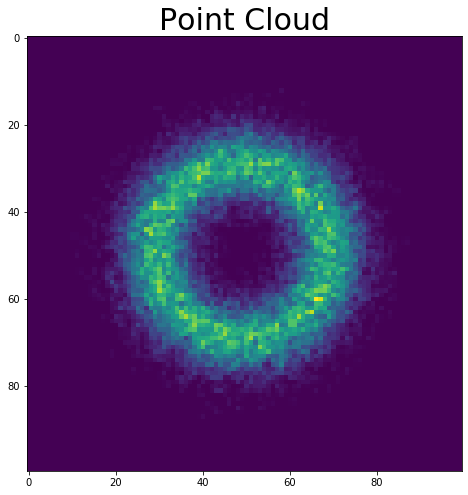

In [310]:
plt.figure(figsize=(8,8))
plt.title("Point Cloud",fontsize=30)
plt.imshow(grid.CIC_interp(particles))

In [345]:


# Constants
M = 100
target = 1e-6   # Target accuracy
a = 0.01
epsilon0 = 8.85e-12

# Create arrays to hold potential values
phi = np.zeros([M+1,M+1],float)
phi[0,:] = 0
phiprime = np.empty([M+1,M+1],float)
a = 1e-10
# Main loop
delta = 1.0


while delta > target:
    for i in range(1,M):
        for j in range(1,M):
            phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4 + a**2/4/epsilon0*cell[i,j] 
            #calculate max difference        
            delta = np.max(abs(phi - phiprime))
            #swap the two arrays
            phi[i,j],phiprime[i,j] = phiprime[i,j],phi[i,j]

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


1.0

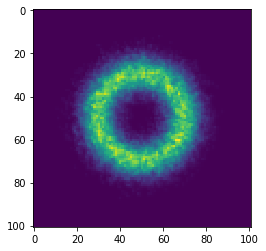

In [347]:
plt.imshow(phi)

In [311]:
cell = grid.CIC_interp(particles)

In [314]:
cell[50,80]

16.26819249810498